In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pltwa
import geopandas as gpd
from shapely.geometry import Point, LineString
import contextily as cx

/home/alh/PycharmProjects/.venv_spatial/lib/python3.8/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
### subbasins of DRB
drb = gpd.read_file('DRB_shapefiles/drb147.shp')
# crs = drb.crs
crs = 4386
drb = drb.to_crs(crs)

<AxesSubplot:>

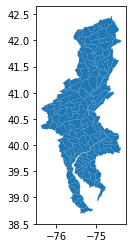

In [3]:
drb.plot()

In [4]:
drb.head()

,OBJECTID,SQM,STATEID,BASIN_ID,STREAMS,Shape_Leng,Shape_Area,HUC8_Name,geometry
0,1,143.786,NY,DB-001,Upper West Br Delaware River,118207.572777,3.721045e+08,Upper Delaware,"POLYGON ((-74.82875 42.39162, -74.82836 42.391..."
1,2,210.122,NY,DB-010,Upper East Br Delaware River above Platte Kill,122934.231306,5.437886e+08,East Branch Delaware,"POLYGON ((-74.55828 42.36694, -74.55810 42.366..."
2,3,82.850,NY,DB-003,Middle West Br Delaware River,99450.679160,2.144097e+08,Upper Delaware,"POLYGON ((-75.04722 42.30324, -75.04738 42.304..."
3,4,52.263,NY,DB-002,Little Delaware River,67203.776328,1.352514e+08,Upper Delaware,"POLYGON ((-74.66058 42.29525, -74.66106 42.294..."
4,5,53.084,NY,DB-004,"Third Branch, West Branch, East Branch",58100.667902,1.373790e+08,Upper Delaware,"POLYGON ((-75.20544 42.25282, -75.20538 42.252..."


In [5]:
### river itself
driv = gpd.read_file('DRB_shapefiles/delawareriver.shp')
driv = driv.to_crs(crs)

<AxesSubplot:>

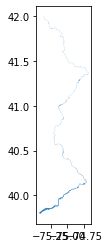

In [6]:
driv.plot()

In [7]:
### streamflow and precip gages
sgage = gpd.read_file('DRB_shapefiles/streamgage_point.shp')
sgage = sgage.to_crs(crs)
pgage = gpd.read_file('DRB_shapefiles/precgage_point.shp')
pgage = pgage.to_crs(crs)

In [8]:
'01432900' in sgage['GAGE_USGS_'].values

True

<AxesSubplot:>

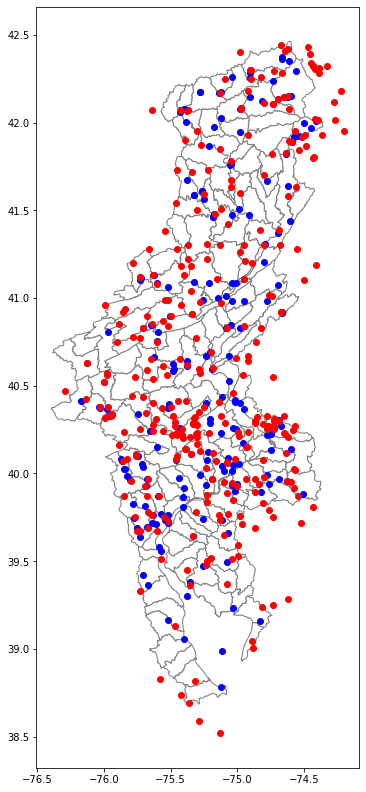

In [9]:
ax = drb.plot(figsize=(14,14), color='w',edgecolor='0.5')
sgage.plot(color='b', legend=True, ax=ax)
pgage.plot(color='r', legend=True, ax=ax)

In [10]:
### dams from grand database
dams = gpd.read_file('GRanD_Version_1_3/GRanD_dams_v1_3.shp')
dams = dams.to_crs(crs)

In [11]:
dams.columns

Index(['GRAND_ID', 'RES_NAME', 'DAM_NAME', 'ALT_NAME', 'RIVER', 'ALT_RIVER',
       'MAIN_BASIN', 'SUB_BASIN', 'NEAR_CITY', 'ALT_CITY', 'ADMIN_UNIT',
       'SEC_ADMIN', 'COUNTRY', 'SEC_CNTRY', 'YEAR', 'ALT_YEAR', 'REM_YEAR',
       'DAM_HGT_M', 'ALT_HGT_M', 'DAM_LEN_M', 'ALT_LEN_M', 'AREA_SKM',
       'AREA_POLY', 'AREA_REP', 'AREA_MAX', 'AREA_MIN', 'CAP_MCM', 'CAP_MAX',
       'CAP_REP', 'CAP_MIN', 'DEPTH_M', 'DIS_AVG_LS', 'DOR_PC', 'ELEV_MASL',
       'CATCH_SKM', 'CATCH_REP', 'DATA_INFO', 'USE_IRRI', 'USE_ELEC',
       'USE_SUPP', 'USE_FCON', 'USE_RECR', 'USE_NAVI', 'USE_FISH', 'USE_PCON',
       'USE_LIVE', 'USE_OTHR', 'MAIN_USE', 'LAKE_CTRL', 'MULTI_DAMS',
       'TIMELINE', 'COMMENTS', 'URL', 'QUALITY', 'EDITOR', 'LONG_DD', 'LAT_DD',
       'POLY_SRC', 'geometry'],
      dtype='object')

In [12]:
### clip to drb
dams = dams.clip(drb)
dams

,GRAND_ID,RES_NAME,DAM_NAME,ALT_NAME,RIVER,ALT_RIVER,MAIN_BASIN,SUB_BASIN,NEAR_CITY,ALT_CITY,...,MULTI_DAMS,TIMELINE,COMMENTS,URL,QUALITY,EDITOR,LONG_DD,LAT_DD,POLY_SRC,geometry
1661,1662,None,Union Lake Dam,None,Maurice River,None,None,None,None,None,...,None,None,None,http://www.state.nj.us/dep/damsafety/,2: Good,UNH,-75.052993,39.403305,SWBD,POINT (-75.05299 39.40331)
1632,1633,Springton Reservoir,Geist Storage,None,Crum Creek,None,None,None,None,None,...,None,None,None,http://www.dep.state.pa.us/dep/deputate/waterm...,2: Good,UNH,-75.394975,39.952399,SWBD,POINT (-75.39497 39.95240)
2241,2242,None,Van Sciver Lake,None,Scotts Creek,None,None,None,None,None,...,None,None,None,http://www.dep.state.pa.us/dep/deputate/waterm...,3: Fair,UNH,-74.773588,40.132892,SWBD,POINT (-74.77359 40.13289)
2239,2240,None,Assunpink Dam 6,None,Assunpink Creek,None,None,None,None,None,...,None,None,None,http://www.state.nj.us/dep/damsafety/,5: Unreliable,UNH,-74.582681,40.233904,SWBD,POINT (-74.58268 40.23390)
1617,1618,None,Greenlane Reservoir,None,Perkiomen Creek,None,None,None,None,None,...,None,None,None,http://www.dep.state.pa.us/dep/deputate/waterm...,2: Good,UNH,-75.480303,40.342319,SWBD,POINT (-75.48030 40.34232)
1614,1615,Blue Marsh Lake,Blue Marsh Dam,None,Tulpehocken Creek,None,None,None,None,None,...,None,None,None,http://www.nap.usace.army.mil/sb/bm_guide.htm,3: Fair,UNH,-76.034375,40.382474,SWBD,POINT (-76.03437 40.38247)
1609,1610,None,Nockamixon,None,Tohickon Creek,None,None,None,None,None,...,None,None,None,http://www.dep.state.pa.us/dep/deputate/waterm...,2: Good,UNH,-75.186908,40.469862,SWBD,POINT (-75.18691 40.46986)
1590,1591,None,Merrill Creek Main Dam,None,Merrill Creek,None,None,None,None,None,...,None,None,None,http://www.state.nj.us/dep/damsafety/,2: Good,UNH,-75.102245,40.727985,SWBD,POINT (-75.10224 40.72799)
1584,1585,Beltzville Lake,Beltzville Dam,None,Pohopoco Creek,None,None,None,None,None,...,None,None,None,http://www.nap.usace.army.mil/cenap-dp/project...,2: Good,UNH,-75.637744,40.849430,SWBD,POINT (-75.63774 40.84943)
1583,1584,None,Still Creek,None,Still Creek,None,None,None,None,None,...,None,None,None,http://www.dep.state.pa.us/dep/deputate/waterm...,2: Good,UNH,-75.988646,40.858524,SWBD,POINT (-75.98865 40.85852)


In [13]:
dams.loc[1559,]

GRAND_ID                                                   1560
RES_NAME                                                   None
DAM_NAME                                          Wallenpaupack
ALT_NAME                                                   None
RIVER                                          Lackawaxen River
ALT_RIVER                                                  None
MAIN_BASIN                                                 None
SUB_BASIN                                                  None
NEAR_CITY                                                  None
ALT_CITY                                                   None
ADMIN_UNIT                                         Pennsylvania
SEC_ADMIN                                                  None
COUNTRY                                           United States
SEC_CNTRY                                                  None
YEAR                                                       1926
ALT_YEAR                                

<AxesSubplot:>

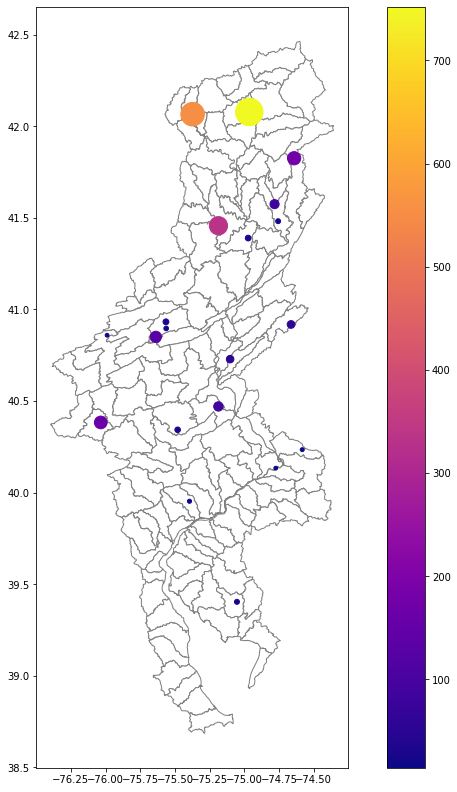

In [14]:
ax = drb.plot(figsize=(14,14), color='w',edgecolor='0.5')
dams.plot('CAP_MCM', markersize='CAP_MCM', cmap='plasma', legend=True, ax=ax)

<AxesSubplot:>

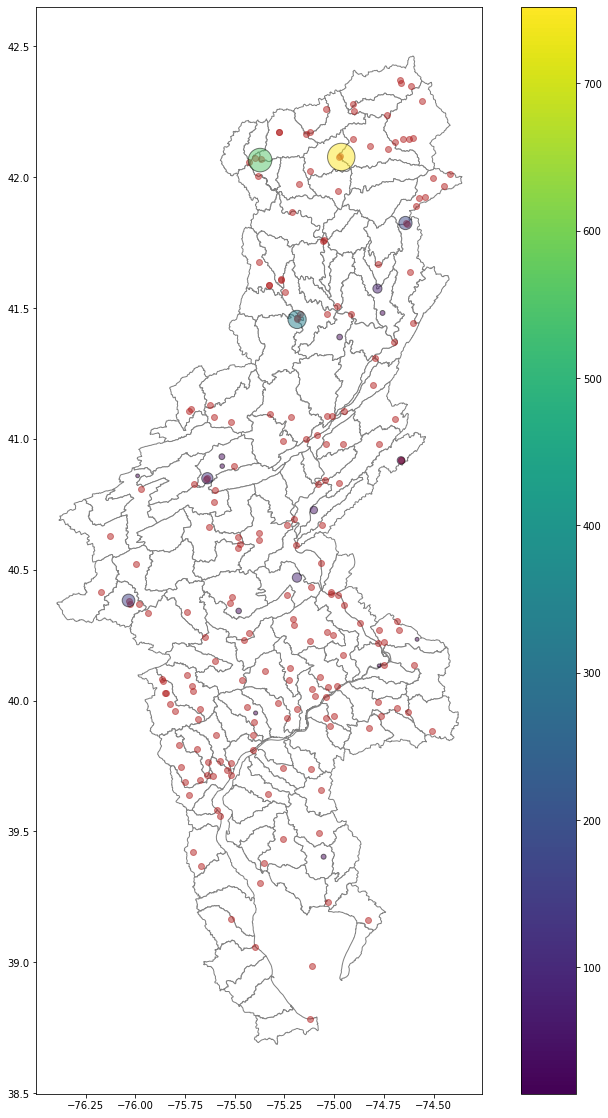

In [15]:
ax = drb.plot(figsize=(14,20), color='w',edgecolor='0.5', zorder=1)
dams.plot('CAP_MCM', markersize='CAP_MCM', cmap='viridis', edgecolor='k', legend=True, ax=ax, zorder=3, alpha=0.5)
sgage.plot(color='firebrick', legend=True, ax=ax, alpha=0.5, zorder=2)


In [16]:
### note: not sure why FEWalter is missing - I believe this has storage of 136MCM, so one of largest in system
dams.loc[:,['RES_NAME','DAM_NAME','CAP_MCM','GRAND_ID']].sort_values('CAP_MCM', ascending=False)

,RES_NAME,DAM_NAME,CAP_MCM,GRAND_ID
2191,Pepacton Reservoir,Downsville Dam,752.1,2192
1549,None,Cannonsville Dam,555.1,1550
1559,None,Wallenpaupack,333.0,1560
2199,None,Neversink Reservoir Dam,175.2,2200
1614,Blue Marsh Lake,Blue Marsh Dam,160.2,1615
1584,Beltzville Lake,Beltzville Dam,127.8,1585
1609,None,Nockamixon,87.6,1610
2203,None,Toronto,83.3,2204
2234,None,Lake Hopatcong Dam,59.5,2235
1590,None,Merrill Creek Main Dam,56.7,1591


In [17]:
### plot nodes from pywr model
nodes = pd.read_csv('../model_data/drb_model_nodes.csv')
nodes_geo = [Point(xy) for xy in zip(nodes['lat'], nodes['long'])]
nodes_gdf = gpd.GeoDataFrame(nodes, geometry=nodes_geo, crs=4326)
nodes_gdf = nodes_gdf.to_crs(crs)
nodes

,name,type,flow,max_volume,initial_volume,initial_volume_pc,cost,storage_nodes,max_flow,mrf,mrf_cost,long,lat,notes,huc12,gages,geometry
0,catchment_cannonsville,catchment,flow_cannonsville,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.128727,-75.278417,NaN,NaN,"inflows: 0142400103 to 1952, 01423000 to 1950",POINT (-75.27842 42.12873)
1,catchment_pepacton,catchment,flow_pepacton,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.120650,-74.672851,NaN,NaN,"inflows: 01415000 to 1937, 01414500 to 1937, 0...",POINT (-74.67285 42.12065)
2,catchment_neversink,catchment,flow_neversink,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.877839,-74.610214,NaN,NaN,inflow: 01435000 to 1937,POINT (-74.61021 41.87784)
3,catchment_delLordville,catchment,flow_delLordville,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.856644,-75.340805,NaN,NaN,"flow: 01427207 to 1967, minus (reservoir_canno...",POINT (-75.34081 41.85664)
4,catchment_wallenpaupack,catchment,flow_wallenpaupack,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.365279,-75.344740,NaN,NaN,none,POINT (-75.34474 41.36528)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,link_outletSchuylkill,link,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.894148,-75.203456,NaN,020402031008 (Schuylkill),NaN,POINT (-75.20346 39.89415)
70,link_outletChristina,link,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.735611,-75.534213,NaN,020402050505 (christina),NaN,POINT (-75.53421 39.73561)
71,demand_nyc,output,NaN,NaN,NaN,NaN,-500,NaN,demand_max_flow_nyc,NaN,NaN,41.929537,-74.326084,NaN,NaN,NaN,POINT (-74.32608 41.92954)
72,demand_nj,output,NaN,NaN,NaN,NaN,-500,NaN,100,NaN,NaN,40.341568,-74.643334,NaN,NaN,NaN,POINT (-74.64333 40.34157)


In [18]:
### now get links between nodes & plot
edges = pd.read_csv('../model_data/drb_model_edges.csv')
node1lat = []
node2lat = []
node1long = []
node2long = []
for i in range(edges.shape[0]):
    node1 = edges['node1'].iloc[i]
    node2 = edges['node2'].iloc[i]
    node1row = nodes.loc[nodes['name'] == node1].iloc[0]
    node2row = nodes.loc[nodes['name'] == node2].iloc[0]
    node1lat.append(node1row.geometry.x)
    node2lat.append(node2row.geometry.x)
    node1long.append(node1row.geometry.y)
    node2long.append(node2row.geometry.y)
edges['node1lat'] = node1lat
edges['node2lat'] = node2lat
edges['node1long'] = node1long
edges['node2long'] = node2long
edges_geo = [LineString([xy1, xy2]) for xy1,xy2 in zip(zip(edges['node1lat'], edges['node1long']), zip(edges['node2lat'], edges['node2long']))]
edges_gdf = gpd.GeoDataFrame(edges, geometry=edges_geo, crs=4326)
edges_gdf = edges_gdf.to_crs(crs)


In [19]:
# ### plot nodes by type
# ax = nodes_gdf.loc[nodes_gdf['type']=='storage'].plot(figsize=(14,18), color='dodgerblue', zorder=2, markersize=100)
# nodes_gdf.loc[nodes_gdf['type']=='catchment'].plot(color='green', zorder=2, markersize=100, ax=ax)
# nodes_gdf.loc[nodes_gdf['type']=='link'].plot(color='navy', zorder=2, markersize=100, ax=ax)
# nodes_gdf.loc[nodes_gdf['type']=='output'].plot(color='firebrick', zorder=2, markersize=100, ax=ax)

# ### plot edges by type
# edges_gdf.loc[edges_gdf['type']=='tributary'].plot(color='dodgerblue', ax=ax, zorder=1, alpha=0.7)
# edges_gdf.loc[edges_gdf['type']=='mainstem'].plot(color='navy', ax=ax, zorder=1, alpha=0.7)
# edges_gdf.loc[edges_gdf['type']=='diversion'].plot(color='firebrick', ax=ax, zorder=1, alpha=0.7)

# ### annotate all except for catchments
# nodes.loc[nodes['type'] != 'catchment'].apply(lambda x: ax.annotate(text=x['name'].split('_',1)[1], xy=x.geometry.coords[0], ha='center', va='bottom', zorder=3, fontsize=12), axis=1);

# # sgage.plot(color='blue', legend=True, ax=ax, alpha=0.5, zorder=2)

# cx.add_basemap(ax, crs=crs, source=cx.providers.CartoDB.Voyager)


In [20]:
### nhd & wbd data
wbd = gpd.read_file('WBD_02/Shape/WBDHU12.shp')
### get drb
wbd = wbd.loc[[wbd['tohuc'][i][:4] == '0204' for i in range(wbd.shape[0])], :]
wbd = wbd.to_crs(crs)
# wbd

In [21]:
# m = wbd.explore(color='burlywood')

# nodes_gdf.loc[nodes_gdf['type']=='storage'].explore(color='dodgerblue', m=m)
# nodes_gdf.loc[nodes_gdf['type']=='catchment'].explore(color='green',  m=m)
# nodes_gdf.loc[nodes_gdf['type']=='link'].explore(color='navy', m=m)
# nodes_gdf.loc[nodes_gdf['type']=='output'].explore(color='firebrick',  m=m)

# ### plot edges by type
# edges_gdf.loc[edges_gdf['type']=='tributary'].explore(color='dodgerblue', m=m)
# edges_gdf.loc[edges_gdf['type']=='mainstem'].explore(color='navy', m=m)
# edges_gdf.loc[edges_gdf['type']=='diversion'].explore(color='firebrick', m=m)


In [22]:
### get subset of huc12s that relate to reservoirs, based on DRB model spreadsheet
usgsdata = pd.read_csv('../model_data/drb_model_usgs_data_sources.csv', dtype=str)
hucs = []
for i in range(usgsdata.shape[0]):
    h = usgsdata['huc12_outlet'].iloc[i]
    if type(h) == str:
        hh = h.replace(' ','')
        hh = hh.split(',')
        for hhh in hh:
            ### account for excel removing zero at beginning of numbers
            if hhh[0] != '0':
                hhh = '0' + hhh
            hucs.append(hhh)
wbd_nodes = wbd.loc[[wbd['huc12'].iloc[i] in hucs for i in range(wbd.shape[0])],:]
wbd_nodes

,tnmid,metasource,sourcedata,sourceorig,sourcefeat,loaddate,referenceg,areaacres,areasqkm,states,...,name,hutype,humod,tohuc,noncontrib,noncontr_1,shape_Leng,shape_Area,ObjectID,geometry
155,{B9CC8B73-B664-402A-9BE8-9A681A1469DF},{ED602145-9201-4827-9CE1-05D252484579},None,None,None,2020-10-28,None,28351.06,114.73,PA,...,Headwaters Little Schuylkill River,S,NM,020402030102,0.0,0.0,0.792847,0.012248,156,"POLYGON ((-75.93539 40.88481, -75.93477 40.884..."
160,{4744FA06-FC9B-49E4-82B8-321007C1552B},{ED602145-9201-4827-9CE1-05D252484579},None,None,None,2017-10-03,None,24282.88,98.27,PA,...,Lower Maiden Creek,S,KA,020402030603,0.0,0.0,0.642081,0.010438,161,"POLYGON ((-75.87426 40.52543, -75.87392 40.524..."
250,{F0E203EA-4F0E-4C5E-A4F0-6DF74D25B44D},None,None,None,None,2013-01-18,None,27912.05,112.96,PA,...,Upper Perkiomen Creek,S,KA,020402030809,0.0,0.0,0.904011,0.011980,251,"POLYGON ((-75.51155 40.42733, -75.51121 40.426..."
268,{B70570CD-259B-45DC-A2FD-3AA9F974294E},{E9F5C988-2313-440E-A05E-C5871E2773A6},None,None,None,2013-01-18,None,10361.61,41.93,PA,...,Middle Tulpehocken Creek,S,KA,020402030409,0.0,0.0,0.457911,0.004449,269,"POLYGON ((-76.08126 40.45397, -76.08112 40.453..."
290,{4BE47D3F-A80C-4D23-956B-E2ADC10C16A2},None,None,None,None,2013-01-18,None,12998.93,52.60,PA,...,Marsh Creek,S,KA,020402050103,0.0,0.0,0.444335,0.005556,291,"POLYGON ((-75.69202 40.10899, -75.69241 40.108..."
446,{782FDF94-8C88-4B75-B65F-3A5FA7825232},{ED602145-9201-4827-9CE1-05D252484579},None,None,None,2017-10-03,None,15643.28,63.31,PA,...,Middle Shohola Creek,S,NM,020401040403,0.0,0.0,0.494080,0.006813,447,"POLYGON ((-74.94039 41.40433, -74.94028 41.404..."
449,{6A176AA5-58D8-4256-A0A0-A4ACA86E614D},{ED602145-9201-4827-9CE1-05D252484579},None,None,None,2017-10-03,None,26516.96,107.31,PA,...,Middle Tohickon Creek,S,NM,020401050703,0.0,0.0,0.762111,0.011393,450,"POLYGON ((-75.19981 40.52356, -75.19958 40.523..."
464,{5B0770B6-1C52-4CC1-B6ED-937403DA28E2},{ED602145-9201-4827-9CE1-05D252484579},None,None,None,2017-10-03,None,15442.85,62.50,"NJ,PA",...,Buck Creek-Delaware River,S,"TF,UA",020402010404,0.0,0.0,0.442981,0.006614,465,"POLYGON ((-74.81447 40.28301, -74.81490 40.282..."
503,{AF7F2927-195C-47C6-8CAA-93CDA1D3867C},{ED602145-9201-4827-9CE1-05D252484579},None,None,None,2017-10-03,None,22723.11,91.96,NY,...,Holliday Brook-East Branch Delaware River,S,RS,020401020502,0.0,0.0,0.613669,0.010004,504,"POLYGON ((-74.92462 42.10749, -74.92455 42.107..."
506,{046201DD-9B7D-426C-8A55-D5682A1E32D2},{ED602145-9201-4827-9CE1-05D252484579},None,None,None,2017-10-03,None,19496.63,78.90,NY,...,Neversink River,S,RS,020401040305,0.0,0.0,0.504816,0.008557,507,"POLYGON ((-74.59970 41.92772, -74.59873 41.927..."


In [23]:
### now get streamflow gages associated with nodes
gages = []
for i in range(usgsdata.shape[0]):
    s = usgsdata['USGS_gages'].iloc[i]
    if type(s) == str:
        ss = s.replace(' ','')
        ss = ss.split(',')
        for sss in ss:
            ### account for excel removing zero at beginning of numbers
            if sss[0] != '0':
                sss = '0' + sss
            gages.append(sss)
        
sgage = sgage.loc[[sgage['GAGE_USGS_'].iloc[i] in gages for i in range(sgage.shape[0])],:]

In [24]:
'01433500' in sgage['GAGE_USGS_'].values

False

In [25]:
### now get links between nodes & plot
edges = pd.read_csv('../model_data/drb_model_edges.csv')
edges = edges.loc[['catchment' not in node1 for node1 in edges['node1']], :]
node1lat = []
node2lat = []
node1long = []
node2long = []
for i in range(edges.shape[0]):
    node1 = edges['node1'].iloc[i]
    node2 = edges['node2'].iloc[i]
    node1row = nodes.loc[nodes['name'] == node1].iloc[0]
    node2row = nodes.loc[nodes['name'] == node2].iloc[0]
    node1lat.append(node1row.geometry.x)
    node2lat.append(node2row.geometry.x)
    node1long.append(node1row.geometry.y)
    node2long.append(node2row.geometry.y)
edges['node1lat'] = node1lat
edges['node2lat'] = node2lat
edges['node1long'] = node1long
edges['node2long'] = node2long
edges_geo = [LineString([xy1, xy2]) for xy1,xy2 in zip(zip(edges['node1lat'], edges['node1long']), zip(edges['node2lat'], edges['node2long']))]
edges_gdf = gpd.GeoDataFrame(edges, geometry=edges_geo, crs=4326)
edges_gdf = edges_gdf.to_crs(crs)


In [26]:
### plot huc12's associated with nodes
m = wbd_nodes.explore(color='burlywood')

### plot nodes
nodes_gdf.loc[nodes_gdf['type']=='storage'].explore(color='dodgerblue', m=m)
nodes_gdf.loc[nodes_gdf['type']=='link'].explore(color='navy', m=m)
nodes_gdf.loc[nodes_gdf['type']=='output'].explore(color='firebrick',  m=m)

### plot edges
edges_gdf.loc[edges_gdf['type']=='tributary'].explore(color='dodgerblue', m=m)
edges_gdf.loc[edges_gdf['type']=='mainstem'].explore(color='navy', m=m)
edges_gdf.loc[edges_gdf['type']=='diversion'].explore(color='firebrick', m=m)

### plot usgs gages associated with nodes
sgage.explore(color='aqua', m=m)

In [27]:
nodes_gdf.loc[nodes_gdf['type'] == 'storage']

,name,type,flow,max_volume,initial_volume,initial_volume_pc,cost,storage_nodes,max_flow,mrf,mrf_cost,long,lat,notes,huc12,gages,geometry
24,reservoir_cannonsville,storage,NaN,max_volume_cannonsville,73320.93863,0.5,storage_cost_cannonsville,NaN,NaN,NaN,NaN,42.065872,-75.374620,NaN,20401010207,outflow: 01425000 to 1952,POINT (-75.37462 42.06587)
25,reservoir_pepacton,storage,NaN,max_volume_pepacton,99341.88063,0.5,storage_cost_pepacton,NaN,NaN,NaN,NaN,42.073603,-74.965531,NaN,20401020405,outflow: 01417000 to 1903,POINT (-74.96553 42.07360)
26,reservoir_neversink,storage,NaN,max_volume_neversink,23141.46720,0.5,storage_cost_neversink,NaN,NaN,NaN,NaN,41.821286,-74.643266,NaN,20401040303,outflow: 01436000 to 1941,POINT (-74.64327 41.82129)
27,reservoir_wallenpaupack,storage,NaN,max_volume_wallenpaupack,43984.63800,0.5,-10,NaN,NaN,NaN,NaN,41.460825,-75.184230,NaN,20401030505,"none, but could approximate as (01432110 to 19...",POINT (-75.18423 41.46082)
28,reservoir_prompton,storage,NaN,max_volume_prompton,1888.82980,0.5,-10,NaN,NaN,NaN,NaN,41.589961,-75.327680,NaN,20401030103,outflow: 01429000 to 1942,POINT (-75.32768 41.58996)
29,reservoir_shoholaMarsh,storage,NaN,max_volume_shoholaMarsh,4306.00360,0.5,-10,NaN,NaN,NaN,NaN,41.392015,-74.968660,NaN,20401040402,"none, there is only 01432495, but this is ~10 ...",POINT (-74.96866 41.39202)
30,reservoir_mongaupeCombined,storage,NaN,max_volume_mongaupeCombined,14186.03640,0.5,-10,NaN,NaN,NaN,NaN,41.478898,-74.755352,"mongaupe system includes many reservoirs, incl...",20401040107,outflow: 01433500 to 1939,POINT (-74.75535 41.47890)
31,reservoir_beltzvilleCombined,storage,NaN,max_volume_beltzvilleCombined,24158.52940,0.5,-10,NaN,NaN,NaN,NaN,40.851266,-75.638495,includes penn forest & wild creek reservoirs u...,20401060404,outflow: 01449800 to 1967,POINT (-75.63850 40.85127)
32,reservoir_fewalter,storage,NaN,max_volume_fewalter,1888.82980,0.5,-10,NaN,NaN,NaN,NaN,41.113559,-75.720849,NaN,20401060204,outflow: 01447800 to 1955,POINT (-75.72085 41.11356)
33,reservoir_merrillCreek,storage,NaN,max_volume_merrillCreek,7489.27620,0.5,-10,NaN,NaN,NaN,NaN,40.727174,-75.102810,NaN,20401050402,none,POINT (-75.10281 40.72717)
